# Лабораторная работа 2. Методы поиска

Ананикян Тигран 

Вариант 1 

## Интерполяционный поиск 

#### 1. Теоретическое описание алгоритма

Метод сортировки "Интерполяционный поиск" основан на принципе использования интерполяции для определения ближайшего значения в отсортированном массиве.
Интерполяционный поиск работает только на отсортированных массивах и является эффективным методом для поиска элемента в отсортированном массиве. Он использует формулу интерполяции для нахождения приблизительного положения элемента в массиве и затем выполняет поиск путем проверки элементов по порядку от найденного приблизительного положения.


##### Алгоритм работы:

1. Определите границы поиска, т.е. начальный и конечный индексы в массиве, в которых находятся элементы, между которыми находится искомый элемент.

2. Рассчитайте позицию искомого элемента в массиве, используя формулу: 
```
pos = low + ((x - arr[low]) * (high - low)) / (arr[high] - arr[low])
```
где `x` - искомый элемент, `arr` - отсортированный массив, `low` и `high` - начальный и конечный индексы границ поиска соответственно.

3. Сравните найденный элемент с искомым. Если они равны, то позиция найдена.

4. Если найденный элемент меньше искомого, то продолжайте поиск в правой части массива, изменяя нижнюю границу поиска.
5. Если найденный элемент больше искомого, то продолжайте поиск в левой части массива, изменяя верхнюю границу поиска.

6. Повторяйте шаги 2-5 до тех пор, пока не будет найден элемент или границы поиска не будут пересечены.

7. Если элемент не найден, то он отсутствует в массиве.


#### 2. Блок схема алгоритма 

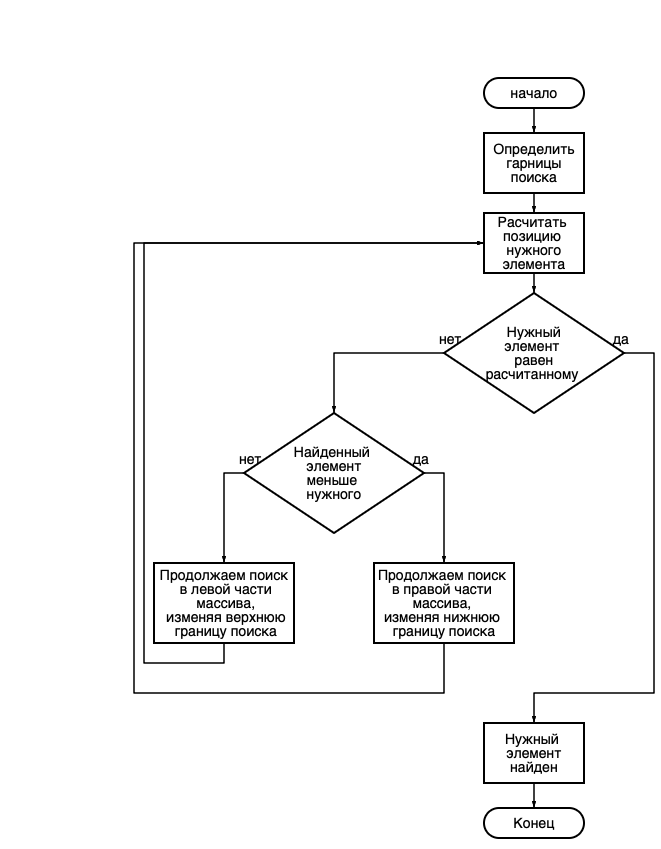

In [8]:
from IPython.display import Image
Image(filename='Desktop/interpol.png')

#### 3. Псевдокод 

In [ ]:
function interpolationSearch(arr, x):
    low = 0
    high = arr.length - 1
    while low <= high and x >= arr[low] and x <= arr[high]:
        pos = low + ((x - arr[low]) * (high - low)) / (arr[high] - arr[low])
        if arr[pos] == x:
            return pos
        elif arr[pos] < x:
            low = pos + 1
        else:
            high = pos - 1
    return -1


#### 4. Достоинства и недостатки

Достоинства:
1. Более эффективный, чем простой линейный поиск, особенно для больших массивов данных.

2. Более быстрый, чем двоичный поиск, если элементы массива равномерно распределены.

3. Возможность использования для поиска в огромных массивах данных, таких как базы данных.

4. Эффективное использование времени при поиске элемента, так как в каждой итерации поиск уменьшает размер области поиска.

Недостатки:

1. Он может работать медленнее, чем двоичный поиск, если элементы массива не равномерно распределены.

2. При некоторых условиях может привести к бесконечному циклу.

3. Не гарантирует точности результата, если элементы массива не отсортированы.

4. Использование формулы интерполяции может привести к ошибкам округления, что может привести к неверному результату.


#### 5. Реализация кода 

In [3]:

def interpolation_search(arr, n, x):
    # Инициализация индексов начала и конца
    low = 0
    high = n - 1
 
    while low <= high and x >= arr[low] and x <= arr[high]:
        # Интерполяционный расчет индекса среднего элемента
        pos = low + ((x - arr[low]) * (high - low)) // (arr[high] - arr[low])
 
        # Если x был найден
        if arr[pos] == x:
            return pos
 
        # Если x меньше, чем средний элемент, ищем в левой половине
        if arr[pos] > x:
            high = pos - 1
 
        # Если x больше, чем средний элемент, ищем в правой половине
        else:
            low = pos + 1
 
    # Если элемент не присутствует в массиве
    return -1


#### 6. Тесты

In [ ]:
#Тест случая, когда массив содержит повторяющиеся элементы
    arr = [1, 2, 3, 4, 4, 4, 5, 6, 7, 8, 9, 10]
    n = len(arr)
    assert interpolation_search(arr, n, 4) == 3

# Тест случая, когда массив содержит отрицательные элементы
    arr = [-5, -3, 0, 2, 4, 6, 8, 10]
    n = len(arr)
    assert interpolation_search(arr, n, -3) == 1

# Тест случая, когда массив содержит только один элемент
    arr = [1]
    n = len(arr)
    assert interpolation_search(arr, n, 1) == 0


#### 7. Провести сравнение указанных алгоритмов поиска для массивов, содержащих n1, n2, n3 и n4 элементов.

In [2]:
import time

# Функция для интерполяционного поиска
def interpolation_search(arr, x):
    n = len(arr)
    low = 0
    high = n - 1
 
    while low <= high and x >= arr[low] and x <= arr[high]:
        pos = low + ((x - arr[low]) * (high - low)) // (arr[high] - arr[low])
        if arr[pos] == x:
            return pos
        elif arr[pos] < x:
            low = pos + 1
        else:
            high = pos - 1
 
    return -1

# Функция для сравнения времени выполнения интерполяционного поиска
def compare_interpolation_search(n):
    arr = [i for i in range(n)]
    start_time = time.time()
    interpolation_search(arr, n-1)
    end_time = time.time()
    print(f"Время выполнения интерполяционного поиска для массива размером {n} элементов: {end_time - start_time} секунд")

# Сравнение времени выполнения для разных размеров массивов
compare_interpolation_search(1000)
compare_interpolation_search(5000)
compare_interpolation_search(10000)
compare_interpolation_search(100000)


Время выполнения интерполяционного поиска для массива размером 1000 элементов: 1.0013580322265625e-05 секунд
Время выполнения интерполяционного поиска для массива размером 5000 элементов: 4.0531158447265625e-06 секунд
Время выполнения интерполяционного поиска для массива размером 10000 элементов: 2.86102294921875e-06 секунд
Время выполнения интерполяционного поиска для массива размером 100000 элементов: 1.0967254638671875e-05 секунд


## Алгоритм имитации отжига

#### 1. Теоретическое описание алгоритма

Oбщий алгоритмический метод решения задачи глобальной оптимизации, особенно дискретной и комбинаторной оптимизации.
Алгоритм основывается на имитации физического процесса, который происходит при кристаллизации вещества, в том числе при отжиге металлов. Предполагается, что атомы вещества уже почти выстроены в кристаллическую решётку, но ещё допустимы переходы отдельных атомов из одной ячейки в другую. Активность атомов тем больше, чем выше температура, которую постепенно понижают, что приводит к тому, что вероятность переходов в состояния с большей энергией уменьшается. Устойчивая кристаллическая решётка соответствует минимуму энергии атомов, поэтому атом либо переходит в состояние с меньшим уровнем энергии, либо остаётся на месте. (Этот алгоритм также называется алгоритмом Н. Метрополиса, по имени его автора).

##### Алгоритм работы:

1. Задать начальное состояние системы, которое может быть выбрано случайным образом или предварительно определено в соответствии с задачей оптимизации.
2. Задать начальное значение температуры T и установить значение параметра охлаждения α.
3. На каждой итерации алгоритма выбрать случайное новое состояние из соседних состояний текущего состояния.
4. Вычислить изменение функции цели ΔE, вызванное переходом из текущего состояния в новое состояние.
5. Если ΔE < 0, то принять новое состояние как текущее.
6. Если ΔE > 0, то принять новое состояние с вероятностью exp(-ΔE/T), где exp - экспоненциальная функция.
7. Уменьшить температуру T на α.
8. Повторять шаги 3-7, пока не будет достигнут критерий остановки, который может быть связан с количеством итераций, достижением заданного значения функции цели или установленного значения температуры.

#### 2. Блок схема алгоритма

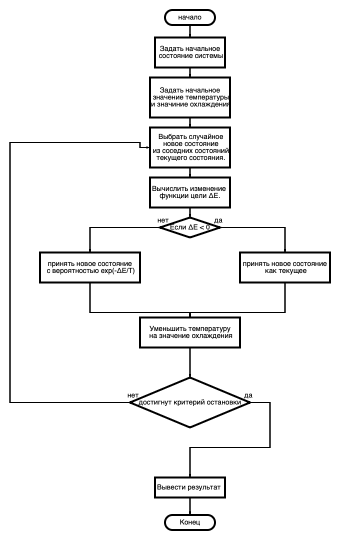

In [7]:
from IPython.display import Image
Image(filename='Desktop/otzig.png')

#### 3. Псевдокод

In [ ]:
#include <iostream>
#include <cmath>
#include <random>

using namespace std;

double f(double x) {
    // функция, которую нужно оптимизировать
    return -x * sin(sqrt(abs(x)));
}

int main() {
    random_device rd;
    mt19937 gen(rd());
    uniform_real_distribution<> dis(-10.0, 10.0);

    double s = dis(gen); // начальное состояние
    double T = 100.0; // начальная температура
    double alpha = 0.99; // параметр охлаждения
    double T_min = 1e-8; // минимальная температура
    double E = f(s); // функция цели текущего состояния

    while (T > T_min) { 
        double s_new = s + dis(gen); 
        double E_new = f(s_new); 
        double delta_E = E_new - E; 
        
        if (delta_E < 0) { // если функция цели уменьшилась, принимаем новое состояние
            s = s_new;
            E = E_new;
        } else {
            double p = exp(-delta_E / T); // вероятность принять новое состояние
            double r = dis(gen); 
            if (r < p) { 
                s = s_new;
                E = E_new;
            }
        }

        T *= alpha; // охлаждение
    }

    cout << "Minimum found at x = " << s << endl;
    cout << "Minimum value = " << E << endl;

    return 0;
}


#### 4. Достоинства и недостатки

Достоинства:

1. Может найти глобальный оптимум в многомерном пространстве, если ему дать достаточно времени и правильно настроить параметры.
2. Может работать с функциями цели, которые не являются дифференцируемыми или непрерывными.
3. Прост в реализации и не требует большого количества ресурсов.

Недостатки:

1. Требует настройки параметров, таких как начальная температура, параметр охлаждения и т.д., чтобы добиться хороших результатов.
2. Не всегда гарантирует сходимость к оптимуму, и время работы может быть неопределенным.
3. Требует большого количества итераций для поиска оптимума с высокой точностью.

#### 5. Реализация кода

In [4]:
import random
import math

# Функция, которую мы хотим оптимизировать
def func(x):
    return x**2

# Начальное состояние системы
current_state = random.uniform(-10, 10)

# Начальная температура и скорость охлаждения
T = 100
alpha = 0.99

# Критерий остановки - количество итераций
max_iter = 1000
iter_count = 0

# Цикл оптимизации
while iter_count < max_iter:
    # Генерируем новое состояние
    new_state = current_state + random.uniform(-1, 1)
    # Вычисляем изменение функции цели
    delta_E = func(new_state) - func(current_state)
    # Если новое состояние лучше, принимаем его
    if delta_E < 0:
        current_state = new_state
    # Если новое состояние хуже, принимаем его с некоторой вероятностью
    else:
        prob_accept = math.exp(-delta_E / T)
        if random.uniform(0, 1) < prob_accept:
            current_state = new_state
    # Уменьшаем температуру
    T *= alpha
    iter_count += 1

# Выводим найденное оптимальное решение
print("Оптимальное решение:", current_state)


Оптимальное решение: 0.026472732592481618


#### 6. Тесты

Выше представлен код программы в которой тестируется функция x^2

In [ ]:
##Проверка, что начальное состояние системы находится в пределах от -10 до 10
import pytest

def test_initial_state():
    current_state = random.uniform(-10, 10)
    assert -10 <= current_state <= 10

##Проверка, что функция func() правильно вычисляет квадрат аргумента:

def test_func():
    assert func(3) == 9
    assert func(-3) == 9
    assert func(0) == 0

##Проверка, правильно ли код обрабатывает отрицательные значения x.

def test_negative_x():

    current_state = random.uniform(-10, 0)

    random.seed(2)

    max_iter = 200

    for i in range(max_iter):
        new_state = current_state + random.uniform(-1, 1)
        delta_E = func(new_state) - func(current_state)
 
        if delta_E < 0:
            current_state = new_state

        else:
            prob_accept = math.exp(-delta_E / T)
            if random.uniform(0, 1) < prob_accept:
                current_state = new_state

        T *= alpha

 
    assert abs(current_state) < 0.1, "Optimization failed"


#### 7.Найти экстремумы функции 12*x^3+12*x^2 с точностью до 10^(-4)

In [6]:
import random
import math

# Функция, которую мы хотим оптимизировать
def func(x):
    return 12 * x**3 + 12 * x**2

# Начальное состояние системы
current_state = random.uniform(-10, 10)

# Начальная температура и скорость охлаждения
T = 100
alpha = 0.99

# Точность
precision = 1e-4

# Цикл оптимизации
while T > precision:
    new_state = current_state + random.uniform(-1, 1)
    delta_E = func(new_state) - func(current_state)

    if delta_E < 0:
        current_state = new_state
    # Если новое состояние хуже, принимаем его с некоторой вероятностью
    else:
        prob_accept = math.exp(-delta_E / T)
        if random.uniform(0, 1) < prob_accept:
            current_state = new_state
    # Уменьшаем температуру
    T *= alpha


print("Оптимальное решение:", current_state)
print("Значение функции:", func(current_state))


Оптимальное решение: -345.8215418609458
Значение функции: -494857003.5513785
